***
***
***

<br><h1 style="font-size:300%;"> Apple vs PC: </h1>
<b>A Study on Hultian Personalities <br>

<b>DAT-5303 | Machine Learning </b>
<br>Andrew D'Armond - 5574864 <br>
Hult International Business School<br><br><br>

***
***
***

<h2>Objective</h2><br>

The objective for this assignment is find hidden trends in the survey data collected by Hult International Business School.
The focus: What kind of laptops do Hult Students have and what are they aiming to buy next.

<h2>The Data </h2><br>

The data is centered on which laptop you currently own and what you are considering in the future to purchase.
The data columns are consistent of questions from the survey to illsutrate a personality type.
Some demographic questions are at the end of the survey as well.

<h1>Libraries & Loading File</h1><br>

In [1]:
########################################
# importing packages
########################################
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

########################################
# loading data and setting display options
########################################
# loading data
final_df = pd.read_excel('survey_data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

/Users/andrewdarmond/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<h2> Scree & Inertia Plots</h2><br>

These plots are essential in ML for this study. 
The first is known as a Scree Plot, which has a purpose to show the proper amount of PCA features to select.
PCA essentially is a technique used to emphasize variation and bring out strong patterns in a dataset.

The second is known as a inertia Plot, which has a purpose to show the proper amount of KMeans clusters to select.
KMeans Clusters is a technique used to emphasize data joining and bring out strong patterns in a dataset.


In [2]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

In [3]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

<h1> Categorical Data</h1><br> 

<h2> Value Counts </h2><br>
I want to see the data in these columns as they offer the most differentiation of data.
I will also be able to see if some of the data is repeating and can be changed

In [4]:
#printing value counts for cat variables

print("""What laptop do you currently have?\n""",
final_df['What laptop do you currently have?'].value_counts()
)

print("""\nWhat laptop would you buy in next assuming if all laptops cost the same?\n""",
final_df['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts()
)

print("""\nWhat program are you in?\n""",
final_df['What program are you in?'].value_counts()
)

print("""\nWhat is your age?\n""",
final_df['What is your age?'].value_counts()
)

print("""\nWhat is your ethnicity?\n""",
final_df['What is your ethnicity?'].value_counts()
)

print("""\nWhat is your gender?\n""",
final_df['Gender'].value_counts()
)

print("""\nWhat is your nationality?\n""",
final_df['What is your nationality? '].value_counts()
)

What laptop do you currently have?
 Macbook           74
Windows laptop    73
Name: What laptop do you currently have?, dtype: int64

What laptop would you buy in next assuming if all laptops cost the same?
 Macbook           83
Windows laptop    60
Chromebook         4
Name: What laptop would you buy in next assuming if all laptops cost the same?, dtype: int64

What program are you in?
 DD (MIB & Business Analytics)       69
One year Business Analytics         39
DD (MBA & Business Analytics)       38
DD (MBA & Disruptive innovation)     1
Name: What program are you in?, dtype: int64

What is your age?
 24    26
25    24
26    14
27    12
23    11
28     9
29     9
22     7
31     5
34     5
33     4
32     3
21     3
36     2
38     2
40     2
43     2
48     1
30     1
35     1
39     1
41     1
45     1
49     1
Name: What is your age?, dtype: int64

What is your ethnicity?
 White / Caucasian       40
Far east Asian          31
Hispanic / Latino       26
West Asian / Indian     26


<h2> Fixing Letter Casing </h2><br>
Some of the nationality has poor casing so i am going to make all lowercase first

In [5]:
#Changing to lower case

final_df['What is your nationality? '] = final_df['What is your nationality? '].str.lower()

final_df['What is your nationality? '].value_counts()

indian                  22
china                   10
mexican                  7
german                   6
peruvian                 5
chinese                  5
russian                  4
taiwan                   4
nigerian                 4
colombian                4
norwegian                3
american                 3
brazilian                3
italian                  3
usa                      3
thai                     2
ecuador                  2
russia                   2
republic of korea        2
brazil                   2
vietnamese               2
indonesian               2
turkish                  2
prefer not to answer     1
dominican                1
germany                  1
portuguese               1
philippines              1
congolese                1
japan                    1
panama                   1
belgian                  1
colombia                 1
korea                    1
ecuadorian               1
filipino                 1
belarus                  1
b

<h2> Creating a Map & Fixing nationalities </h2><br>

The best way to fix the data in a catagorical data column such as this is to create what is known as a map which is a form of dictionary that you can create.
This is because each of the data changing have a key and value change to it.
I will be changing all of these data fields to country names

In [6]:
#Chinese to China
#Dominican to DR
#America to USA
#indian. to Indian to India
#Congolose dr congo to Congolese to Congo
#Ecuadorian to Ecuador
#Russian to Russia
#Brazilian to Brazil
#Colombian to Colombia
#Republica of Korea/Korea to South Korea
#Czech to Czech Republic 
#German to Germany
#Indonesian to Indonesia
#Peruvian to Peru
#Nigerian to Nigeria
#german/american , spanish/italian, british/indian ---> multi ethnic


final_df['What is your nationality? '] = final_df['What is your nationality? '].map({

      'ecuador':'ecuador',

       'indian': 'india',

       'china': 'china',

       'dominican ': 'dominican republic',

        'belgian': 'belgium',

        'swiss':'swiss',

        'japan' : 'japan',

        'costarrican': 'costa rica',

        'ugandan': 'uganda',

        'usa': 'usa',

        'nigerian':'nigeria' ,

        'chinese': 'china',

       'filipino ': 'philippines',

        'philippines': 'philippines',

        'indonesia': 'indonesia',

         'german': 'germany',

         'thai': "thailand",

       'italian': 'italy',

        'turkish': 'turkey',

         'mexican': 'mexico',

        'south korea': 'south korea',

         'norwegian': 'norwegia',

        'korea' : 'south korea',

        'german/american': 'multi-ethnic',

        'peruvian': 'peru',

        'vietnamese': 'vietnam',

        'russian': 'russia',

       'filipino': 'philippines',

       'czech republic': 'cezch republic',

        'peru': 'peru',

       'indonesian': 'indonesia',

        'colombian': 'colombia',

       'brazil' : 'brazil',

       'american': 'usa',

       'italian and spanish': 'multi-ethnic',

        'mauritius' : 'mauritius',

        'brazilian': 'brazil',

       'colombia': 'colombia',

        'taiwan': 'taiwan' ,

        'british, indian': 'multi-ethnic',

         'belarus': 'belarus',

        'venezuelan': 'venezuela',

        'indian.': "india",

        'czech' :  'cezch republic',

        'congolese': 'congo',

        'ukrainian': 'ukraine',

         'nigeria': 'nigeria',

         'kenyan': 'kenya',

          'belgian ': 'belgium',

         'kyrgyz' :'kyrgyz',

           'palestinian': 'palestine',

          'germany': 'germany',

        'republic of korea': 'south korea',

         'british': 'uk',

         'prefer not to answer': 'prefer not to answer',

          'panama': 'panama',

        'portuguese': 'portugal',

       'spain': 'spain',

        'russia': 'russia',

        'canada': 'canada' ,

        'pakistani': 'pakistan',

       'multi-ethnic': 'multi-ethnic',

       'spanish': 'spain',

        'dominican' : 'dominican republic',

        'ghanaian': 'ghana',

        'ecuadorian' :'ecuador',

        'congolese (dr congo)': 'congo',

        'canadian': 'canada'

})



In [7]:
# Checking my work
final_df['What is your nationality? '].value_counts()

india                   23
china                   15
germany                  7
mexico                   7
russia                   6
peru                     6
usa                      6
colombia                 5
brazil                   5
nigeria                  5
south korea              4
taiwan                   4
multi-ethnic             4
ecuador                  3
indonesia                3
italy                    3
norwegia                 3
philippines              3
cezch republic           2
vietnam                  2
dominican republic       2
spain                    2
canada                   2
congo                    2
belgium                  2
turkey                   2
thailand                 2
venezuela                1
kyrgyz                   1
palestine                1
belarus                  1
kenya                    1
portugal                 1
panama                   1
uganda                   1
swiss                    1
ghana                    1
m

<h1> Data Cleaning</h1><br>

Some of the data is not accurate as some of the survey entries did not properly answer the questions and gave answers that contradicted themselves so we wiil remove them.


In [8]:
#Validating data getting rid of rows where duplicate questions answers don't make sense

for index, row in final_df.iterrows():
    if row['Encourage direct and open discussions'] - row['Encourage direct and open discussions.1'] > 3:
        final_df.drop(index, inplace = True)

for index, row in final_df.iterrows():
    if row["Take initiative even when circumstances, objectives, or rules aren't clear"] - row["Take initiative even when circumstances, objectives, or rules aren't clear.1"] > 3:
        final_df.drop(index, inplace = True)

for index, row in final_df.iterrows():
    if row['Respond effectively to multiple priorities'] - row['Respond effectively to multiple priorities.1'] > 3:
        final_df.drop(index, inplace = True)
    
final_df.shape

(147, 79)

In [9]:
#Validating data getting rid of rows where reponse is contradictory
for index, row in final_df.iterrows():
    if row["Am not interested in other people's problems"] - row['Am interested in people'] > 3:
        final_df.drop(index, inplace = True)
        
for index, row in final_df.iterrows():
    if row["Am easily disturbed"] - row['Am relaxed most of the time'] > 3:
        final_df.drop(index, inplace = True)
        
for index, row in final_df.iterrows():
    if row["Have excellent ideas"] - row['Do not have a good imagination'] > 3:
        final_df.drop(index, inplace = True)  
        
final_df.shape

(127, 79)

<h1> Splitting & Scaling Data </h1><br>

I am going to remove the categorical data and scale the data first.
It's important to scale the data as this will allow us to have all of our data 
equal to each other so we can not have certain variables have greater impact then others
this will allow us to get the best score possible.
Second, I am splitting the data by columns with the first being for the personalities and the second for the Hult DNA.


In [10]:
#Removing Categorical and SurveyID from Data

final_df_new = final_df.drop(['What laptop do you currently have?', 
                              'What laptop would you buy in next assuming if all laptops cost the same?',
                              'What program are you in?', 'What is your age?', 
                              'What is your ethnicity?', 'Gender', 'What is your nationality? ', 'surveyID'],
                             axis = 1)


<h2> Scaling</h2><br>

In [11]:
#Scaling the data

scaler = StandardScaler()
scaler.fit(final_df_new)
X_scaled = scaler.transform(final_df_new)

#Converting scaled data into a dataframe
final_scaled = pd.DataFrame(X_scaled)

#Reattaching column names
final_scaled.columns = final_df_new.columns

#Checking pre- and post scaling variance
print(pd.np.var(final_df_new), '\n\n')
print(pd.np.var(final_scaled))



Am the life of the party                                                        1.243846
Feel little concern for others                                                  1.676359
Am always prepared                                                              0.815674
Get stressed out easily                                                         1.442619
Have a rich vocabulary                                                          0.841714
Don't talk a lot                                                                1.111910
Am interested in people                                                         0.914626
Leave my belongings around                                                      1.774072
Am relaxed most of the time                                                     1.192386
Have difficulty understanding abstract ideas                                    1.147622
Feel comfortable around people                                                  0.921446
Insult people        

/Users/andrewdarmond/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/Users/andrewdarmond/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from ipykernel import kernelapp as app


<h2> Splitting </h2><br>

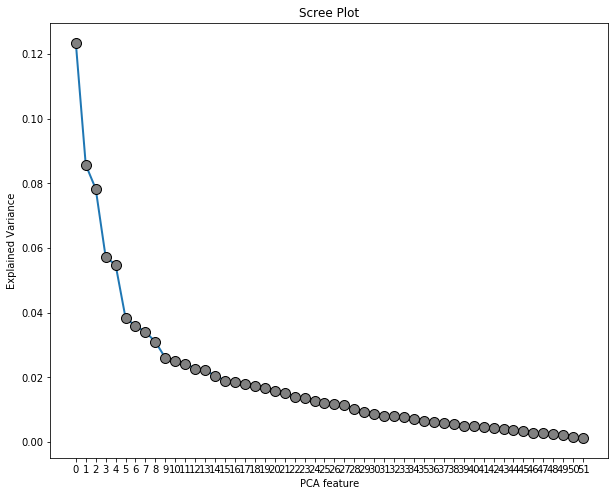

In [12]:
#Splitting for big 5 
personality_s = final_scaled.iloc[:, 0:52]
personality_s.head()

#Instantiating PCA object with no limit to principal components for BIG 5
big_5_pca = PCA(n_components = None,
         random_state = 802)

#Fitting and transforming
personality_pca = big_5_pca.fit_transform(personality_s)

#Calling scree plot function
scree_plot(pca_object = big_5_pca)

# I am choosing 5 features

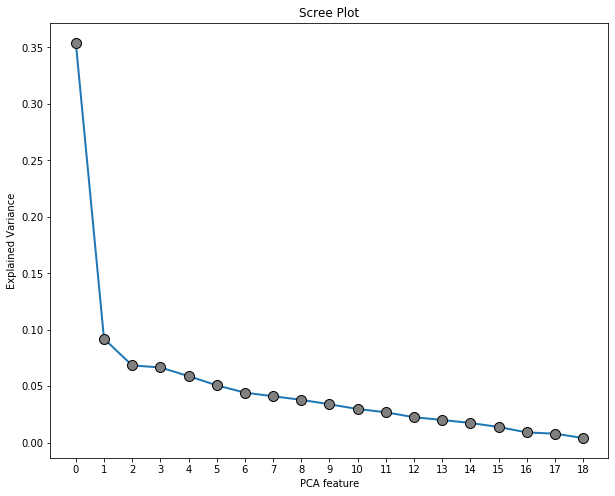

In [13]:
#Splitting for Hult
hult_s = final_scaled.iloc[:, 52:72]
hult_s.head()

#Instantiating PCA object with no limit to principal components for BIG 5
hult_pca = PCA(n_components = None,
         random_state = 802)

#Fitting and transforming
hult_pca_fit = hult_pca.fit_transform(hult_s)

#Calling scree plot function
scree_plot(pca_object = hult_pca)

# I am choosing 3 features

<h2> Features Chosen </h2><br>

I have selected 5 PCA features for the BIG 5 personalities & I have selected 3 PCA features for Hult DNA


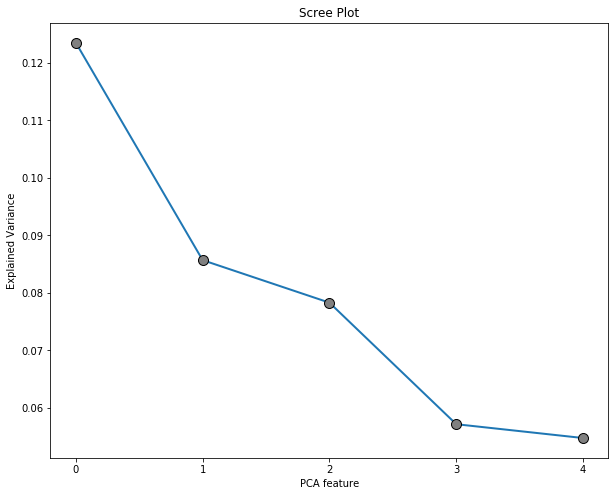

In [14]:
#PCA for BIG 5
pca_5 = PCA(n_components = 5,
           random_state = 802)

#Fitting and Transforming 
personality_pca_5 = pca_5.fit_transform(personality_s)

#Calling the scree_plot function
scree_plot(pca_object = pca_5)

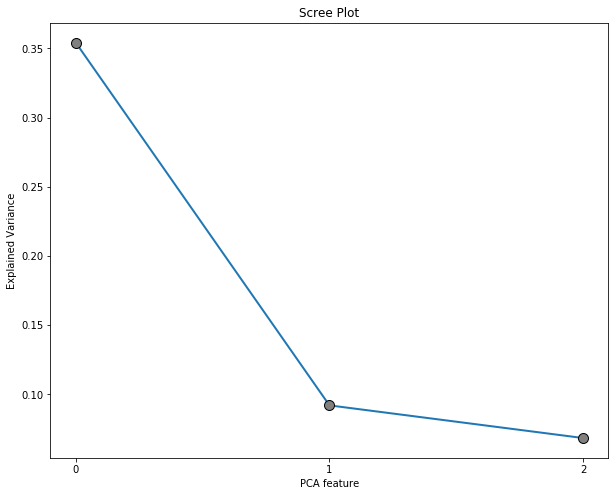

In [15]:
#PCA for HULT DNA
pca_3 = PCA(n_components = 3,
           random_state = 802)

#Fitting and Transforming 
hult_pca_3 = pca_3.fit_transform(hult_s)

#Calling the scree_plot function
scree_plot(pca_object = pca_3)

<h1> PCA </h1><br>

This part is where I will study the data based on number of features i have selected. Now i can see the different groups of i have created and they are matched to each column or survey question.


<h2> Factor Loading </h2><br>

In [16]:

#Max PC Model for BIG 5

# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(big_5_pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(personality_s.columns)


##################
### 5 PC Model ###
##################
# transposing pca components (pc = 5)
factor_loadings_5 = pd.DataFrame(pd.np.transpose(pca_5.components_))


# naming rows as original features
factor_loadings_5 = factor_loadings_5.set_index(personality_s.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


5 Components Factor Loadings
------------------------------
{factor_loadings_5.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                                                          0     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51
Am the life of the party                               0.03 -0.06 -0.30 -0.00 -0.03  0.08 -0.22 -0.06  0.14  0.06 -0.10 -0.19  0.02  0.27 -0.21 -0.01 -0.18  0.05 -0.00 -0.08  0.08  0.06 -0.01  0.21 -0.09  0.07  0.25 -0.12 -0.03 -0.16  0.15 -0.03  0.19  0.10  0.02  0.22  0.32  0.11  0.23  0.00  0.06  0.13 -0.03  0.16 -0.17  0.10  0.08 -0.07  0.15  0.00  0.10 -0.18
Feel little concern for others                         0.15  0.07 -0.10  0.03  0.03 -0.08  0.13 -0.33  0.08 -0.07 -0.11  0.01  0.03  0.20 -0.22 -0.28  0.15 -0.17  0.13  0.28  0.05 -0.20 -0.02 -0.07 -0.03 -

/Users/andrewdarmond/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
/Users/andrewdarmond/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from ipykernel import kernelapp as app


In [17]:

#Max PC Model for HULT DNA

# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(hult_pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(hult_s.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(hult_s.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                                                                                 0     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16    17    18
Demonstrate an awareness of personal strengths and limitations               -0.23  0.07 -0.15  0.14 -0.20  0.10 -0.33 -0.48 -0.16 -0.28  0.51  0.08  0.24 -0.11 -0.03 -0.20 -0.06  0.18 -0.03
Display a growth mindset                                                     -0.21 -0.03  0.09 -0.06 -0.56 -0.05  0.20 -0.20  0.19  0.46  0.27 -0.14 -0.25  0.15  0.12  0.14  0.31 -0.05 -0.02
Respond effectively to multiple priorities                                   -0.25 -0.22 -0.37  0.16 -0.21  0.11 -0.14 -0.11  0.10  0.12 -0.35 -0.08  0.13 -0.23 -0.08  0.11 -0.27 -0.52 -0.19
Take initiative even when circumstances, objectives, or rules aren't clear   -0.27 -0.29  0.06  0.14  0.40 -0.01 -0.09 -0.02  0.16  0.14  0.28 -0.05 -0.18  0.08 -0.21 -0.13 

/Users/andrewdarmond/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
/Users/andrewdarmond/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from ipykernel import kernelapp as app


<h2> Saving to Excel to study </h2><br>

In [18]:
#To excel for big 5

factor_loadings_5.to_excel('personality_factor_5.xlsx')

In [19]:
#To excel for HULT DNA
factor_loadings_3.to_excel('hult_factor_3.xlsx')

<h2> Naming PCA's </h2><br>
Creating persona's based on analysis from factor loading. It's important to do this so business leaders can better understand the data and can make decisions more efficiently.

In [20]:
#Naming each principal component

factor_loadings_5.columns = ['Grumpy',
                            'Laid-Back',
                            'Reserved',
                            'Geek',
                            'Social']

#checking the results
factor_loadings_5.round(2)

,Grumpy,Laid-Back,Reserved,Geek,Social
Am the life of the party,0.03,-0.06,-0.30,-0.00,-0.03
Feel little concern for others,0.15,0.07,-0.10,0.03,0.03
Am always prepared,-0.11,-0.00,-0.02,0.20,-0.07
Get stressed out easily,0.14,-0.26,0.03,-0.04,-0.17
Have a rich vocabulary,-0.13,-0.05,-0.04,0.15,-0.02
Don't talk a lot,0.09,-0.03,0.22,0.12,0.23
Am interested in people,-0.09,-0.10,-0.15,-0.28,0.13
Leave my belongings around,0.11,-0.01,-0.16,-0.03,0.23
Am relaxed most of the time,-0.05,0.18,-0.10,-0.03,0.30
Have difficulty understanding abstract ideas,0.12,-0.12,-0.04,-0.25,-0.03


In [21]:
#Naming each principal component for HULT DNA

factor_loadings_3.columns = ['Rebels',
                            'Average',
                            'HSA']

#checking the results
factor_loadings_3.round(2)

,Rebels,Average,HSA
Demonstrate an awareness of personal strengths and limitations,-0.23,0.07,-0.15
Display a growth mindset,-0.21,-0.03,0.09
Respond effectively to multiple priorities,-0.25,-0.22,-0.37
"Take initiative even when circumstances, objectives, or rules aren't clear",-0.27,-0.29,0.06
Encourage direct and open discussions,-0.25,-0.27,0.33
Respond effectively to multiple priorities.1,-0.29,-0.15,-0.30
"Take initiative even when circumstances, objectives, or rules aren't clear.1",-0.27,-0.27,0.13
Encourage direct and open discussions.1,-0.25,-0.20,0.29
Listen carefully to others,-0.16,0.40,0.26
Don't persuasively sell a vision or idea,0.03,0.40,-0.15


<h1> Transform </h1><br>

In this phase of our analysis, a variety of steps will take place so that we can reach the end conclusion of finding our amount of clusters to select for our KMeans. 

In [22]:
#Analyzing factor strengths per trait for big 5

X_pca_reduced = pca_5.transform(personality_s)

#converting to a DF
X_pca_df = pd.DataFrame(X_pca_reduced)

#checking results
X_pca_df

,0,1,2,3,4
0,-0.167736,-0.028884,0.751293,0.809924,-1.398062
1,0.406283,-1.002446,1.562771,1.887703,1.134069
2,0.800247,5.302550,-0.609147,2.578969,-1.438428
3,4.041461,-0.285343,-1.500274,0.675588,-0.043180
4,3.992910,-1.637162,1.393679,-1.405132,-0.431648
5,2.569693,-1.303212,0.778104,0.189879,-0.931030
6,4.132211,5.050966,-2.387326,-3.490268,2.681790
7,-3.397596,1.566654,-1.217853,0.070667,-0.937054
8,0.855676,1.428557,1.425783,0.225549,-0.420976
9,-3.826237,0.217450,0.944284,2.337051,-2.137190


In [23]:
#Analyzing factor strengths per trait for HULT

X_pca_reduced_h = pca_3.transform(hult_s)

#converting to a DF
X_pca_df_h = pd.DataFrame(X_pca_reduced_h)

#checking results
X_pca_df_h

,0,1,2
0,-0.194335,-0.288326,-0.103224
1,-1.408726,-1.019518,0.851864
2,2.606912,-0.607247,-3.568673
3,3.785895,0.426230,0.633761
4,2.789417,0.614952,-1.632005
5,-1.245955,0.991361,-0.340989
6,-4.677172,-0.216070,0.371003
7,-0.523936,-0.312888,-0.712243
8,0.433309,0.356001,-0.325268
9,-2.979377,-0.708951,-1.033753


<h2> Saving to Excel to Study </h2><br>

In [24]:
X_pca_df.to_excel('personality_subjective_5.xlsx')

In [25]:
X_pca_df.to_excel('hult_subjective_3.xlsx')

<h2> Scaling </h2><br>

We have to scale the data again to our different columns that we have created so that the person's created can be understood fully. This will be done most effectively if the data is scaled to our features and not scaled in a general sense, which we achieved earlier.

In [26]:
#Scaling the data

scaler = StandardScaler()

#Fitting scaler with data
scaler.fit(X_pca_df)

#Transforming
X_scaled_pca = scaler.transform(X_pca_df)

#Converting scaled data into a dataframe
pca_scaled = pd.DataFrame(X_scaled_pca)

#Reattaching column names
pca_scaled.columns = ['Grumpy',
                      'Laid-Back',
                      'Reserved',
                      'Geek',
                      'Social']

#Checking pre- and post scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))



0    6.421725
1    4.456216
2    4.071786
3    2.973308
4    2.848342
dtype: float64 


Grumpy       1.0
Laid-Back    1.0
Reserved     1.0
Geek         1.0
Social       1.0
dtype: float64


/Users/andrewdarmond/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
/Users/andrewdarmond/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


In [27]:
#Scaling the data

scaler = StandardScaler()

#Fitting scaler with data
scaler.fit(X_pca_df_h)

#Transforming
X_scaled_pca_h = scaler.transform(X_pca_df_h)

#Converting scaled data into a dataframe
pca_scaled_h = pd.DataFrame(X_scaled_pca_h)

#Reattaching column names
pca_scaled_h.columns = ['Rebels',
                        'Average',
                        'HSA']

#Checking pre- and post scaling variance
print(pd.np.var(X_pca_df_h), '\n\n')
print(pd.np.var(pca_scaled_h))



0    6.728329
1    1.748222
2    1.299731
dtype: float64 


Rebels     1.0
Average    1.0
HSA        1.0
dtype: float64


/Users/andrewdarmond/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
/Users/andrewdarmond/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


<h2> Dendogram </h2><br>

This shows a visual for the entire data. The importance of this graph is for us to understand when is the best time to find the joining or the data as the numbers increase along the y-axis. In this graph the magic number is 5.

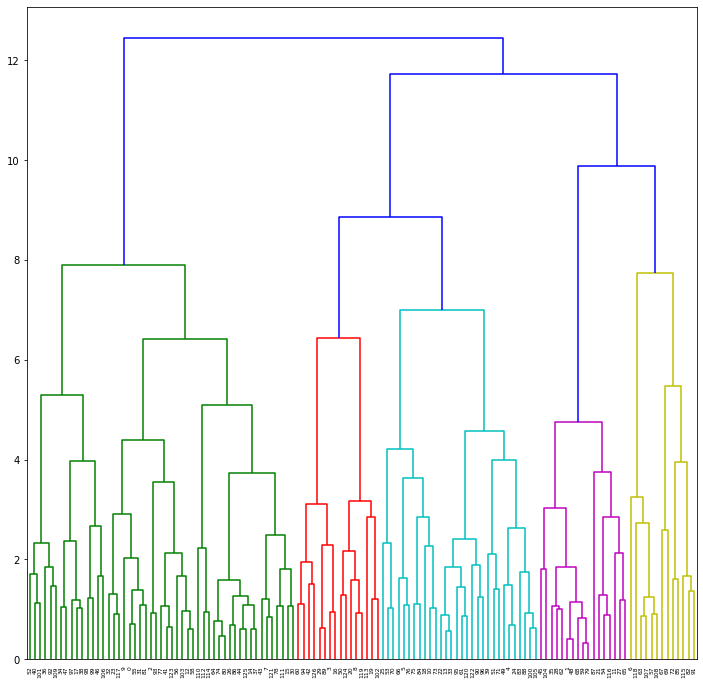

In [28]:
#Grouping data based on ward distance

standard_mergings_ward = linkage(y = pca_scaled,
                                method = 'ward')

#setting plot size
fig, ax = plt.subplots(figsize = (12, 12))

#developing a dendrogram
dendrogram(Z = standard_mergings_ward,
          leaf_rotation = 90,
          leaf_font_size = 6)

#saving and displaying the plot
plt.savefig('standard_hierarchical_clust_ward1.png')
plt.show()

<h2> Interia Plots </h2><br>

This is find the proper Kmeans clusters that we choose in the next step. This is our final step of the transformation phase.

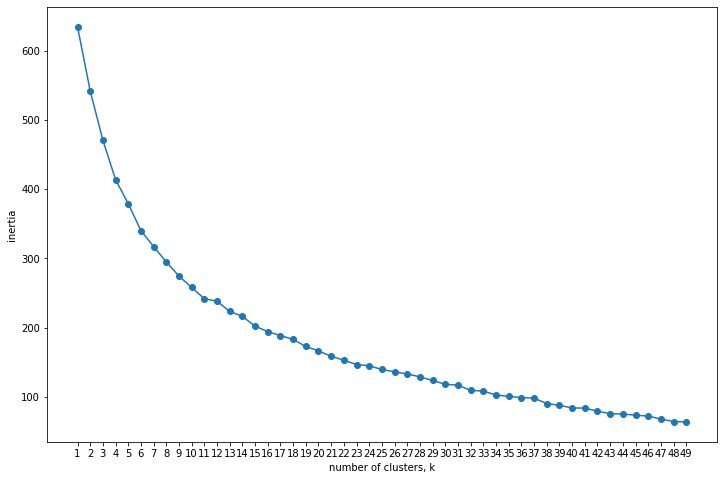

In [29]:
#calling the inertia_plot() function
interia_plot(data = pca_scaled)

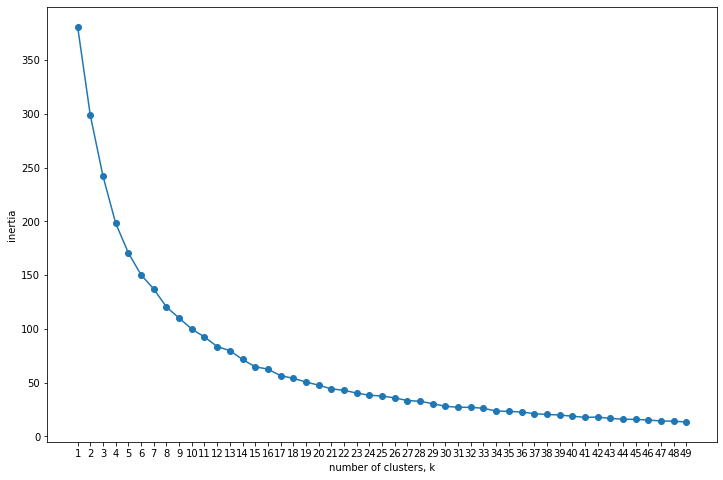

In [30]:
#calling the inertia_plot() function
interia_plot(data = pca_scaled_h)

<h1> KMeans </h1><br>

In this analysis, I have chose to use KMeans clustering and i will use the number of clusters that are at the elbow of the inertia plots above. The chose cluster numbers are 5 clusters for Big 5 and 3 clusters for Hult DNA. This is the final step before we can bring back the categorical data into the model and run visualizations to make our final insights and recommendations

In [31]:
#Instantiating a k-means object with five clusters for BIG 5
personality_k_pca = KMeans(n_clusters = 5,
                          random_state = 802)

#fitting object to data
personality_k_pca.fit(pca_scaled)

#converting the clusters to a DF
personality_kmeans_pca = pd.DataFrame({'Cluster': personality_k_pca.labels_})

#checking results
print(personality_kmeans_pca.iloc[:, 0].value_counts())

2    38
0    31
3    22
4    20
1    16
Name: Cluster, dtype: int64


In [32]:
#storing cluster centers for big 5
centroids_pca = personality_k_pca.cluster_centers_

#converting cluster center into a DF
centroids_pca_df = pd.DataFrame(centroids_pca)

#renaming principal components
centroids_pca_df.columns = ['Grumpy',
                            'Laid-Back',
                            'Reserved',
                            'Geek',
                            'Social']

#Checking results 
centroids_pca_df.round(2)

,Grumpy,Laid-Back,Reserved,Geek,Social
0,0.81,0.72,0.13,0.03,-0.62
1,0.77,0.01,-1.08,-0.75,1.17
2,-1.03,0.16,-0.45,-0.01,-0.34
3,-0.23,-0.15,0.85,0.69,1.05
4,0.34,-1.26,0.59,-0.19,-0.48


In [33]:
#Instantiating a k-means object with three clusters for HULT DNA
personality_k_pca_h = KMeans(n_clusters = 3,
                          random_state = 802)

#fitting object to data
personality_k_pca_h.fit(pca_scaled_h)

#converting the clusters to a DF
personality_kmeans_pca_h = pd.DataFrame({'Cluster': personality_k_pca_h.labels_})

#checking results
print(personality_kmeans_pca_h.iloc[:, 0].value_counts())

1    51
0    40
2    36
Name: Cluster, dtype: int64


In [34]:
#storing cluster centers for HULT DNA
centroids_pca_h = personality_k_pca_h.cluster_centers_

#converting cluster center into a DF
centroids_pca_df_h = pd.DataFrame(centroids_pca_h)

#renaming principal components
centroids_pca_df_h.columns = ['Rebel',
                            'Average',
                            'HSA']

#Checking results 
centroids_pca_df_h.round(2)

,Rebel,Average,HSA
0,0.77,-0.23,0.80
1,0.03,-0.36,-0.77
2,-0.89,0.76,0.21


<h1> Concatenating </h1><br>

Now that we have properly clustered the data using KMeans clustering. I must concatenate the data to now see the how the different groups are affected by each of the categorical variables that we removed from the data earlier.

In [35]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([personality_kmeans_pca,
                         X_pca_df],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([final_df.loc[ : , ['What laptop do you currently have?',
                                            'What laptop would you buy in next assuming if all laptops cost the same?',
                                            'What is your nationality? ',
                                            'What program are you in?',
                                            'What is your ethnicity?',
                                            'Gender',
                                            'What is your age?',
                                            'surveyID']],
                                clst_pca_df],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['What laptop do you currently have?',
                             'What laptop would you buy in next assuming if all laptops cost the same?',
                             'What is your nationality? ',
                             'What program are you in?',
                             'What is your ethnicity?',
                                'Gender',
                                'What is your age?',
                                'surveyID',
                                'Cluster',
                                'Grumpy',
                            'Laid-Back',
                            'Reserved',
                            'Geek',
                            'Social']


# checking the results
print(final_pca_clust_df.head(n = 7))

  What laptop do you currently have? What laptop would you buy in next assuming if all laptops cost the same? What is your nationality?           What program are you in? What is your ethnicity?  Gender  What is your age? surveyID  Cluster    Grumpy  Laid-Back  Reserved      Geek    Social
0                            Macbook                                                                  Macbook                    ecuador     DD (MIB & Business Analytics)       Hispanic / Latino  Female               25.0    a1000      0.0 -0.167736  -0.028884  0.751293  0.809924 -1.398062
1                     Windows laptop                                                           Windows laptop                    ecuador       One year Business Analytics       Hispanic / Latino    Male               27.0    a1001      3.0  0.406283  -1.002446  1.562771  1.887703  1.134069
2                     Windows laptop                                                           Windows laptop                  

In [36]:
# concatenating cluster memberships with principal components
clst_pca_df_h = pd.concat([personality_kmeans_pca_h,
                         X_pca_df_h],
                         axis = 1)


# checking results
clst_pca_df_h


# concatenating demographic information with pca-clusters
final_pca_clust_df_h = pd.concat([final_df.loc[ : , ['What laptop do you currently have?',
                                            'What laptop would you buy in next assuming if all laptops cost the same?',
                                            'What is your nationality? ',
                                            'What program are you in?',
                                            'What is your ethnicity?',
                                            'Gender',
                                            'What is your age?',
                                            'surveyID']],
                                clst_pca_df_h],
                                axis = 1)


# renaming columns
final_pca_clust_df_h.columns = ['What laptop do you currently have?',
                             'What laptop would you buy in next assuming if all laptops cost the same?',
                             'What is your nationality? ',
                             'What program are you in?',
                             'What is your ethnicity?',
                                'Gender',
                                'What is your age?',
                                'surveyID',
                                'Cluster',
                                'Rebel',
                                'Average',
                                'HSA']


# checking the results
print(final_pca_clust_df_h.head(n = 7))

  What laptop do you currently have? What laptop would you buy in next assuming if all laptops cost the same? What is your nationality?           What program are you in? What is your ethnicity?  Gender  What is your age? surveyID  Cluster     Rebel   Average       HSA
0                            Macbook                                                                  Macbook                    ecuador     DD (MIB & Business Analytics)       Hispanic / Latino  Female               25.0    a1000      1.0 -0.194335 -0.288326 -0.103224
1                     Windows laptop                                                           Windows laptop                    ecuador       One year Business Analytics       Hispanic / Latino    Male               27.0    a1001      0.0 -1.408726 -1.019518  0.851864
2                     Windows laptop                                                           Windows laptop                      india       One year Business Analytics     West Asian / In

<h2> Renaming Clusters for Big 5 Personality </h2><br>

It's important to rename these as it will be easier to remember, but more importantly business leaders can make identification of these clusters and make business proper decisions 

In [37]:
# renaming cluster
cluster_names = {0 : 'Surfer',
                 1 : 'Hero',
                 2 : 'Emo',
                 3 : 'Stressball',
                 4 : 'Bipolar'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df


# checking results
data_df

,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What is your nationality?,What program are you in?,What is your ethnicity?,Gender,What is your age?,surveyID,Cluster,Grumpy,Laid-Back,Reserved,Geek,Social
0,Macbook,Macbook,ecuador,DD (MIB & Business Analytics),Hispanic / Latino,Female,25.0,a1000,Surfer,-0.167736,-0.028884,0.751293,0.809924,-1.398062
1,Windows laptop,Windows laptop,ecuador,One year Business Analytics,Hispanic / Latino,Male,27.0,a1001,Stressball,0.406283,-1.002446,1.562771,1.887703,1.134069
2,Windows laptop,Windows laptop,india,One year Business Analytics,West Asian / Indian,Male,25.0,a1002,Surfer,0.800247,5.302550,-0.609147,2.578969,-1.438428
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Surfer,4.041461,-0.285343,-1.500274,0.675588,-0.043180
4,Macbook,Windows laptop,china,DD (MBA & Disruptive innovation),Far east Asian,Male,27.0,a1004,Bipolar,3.992910,-1.637162,1.393679,-1.405132,-0.431648
5,Macbook,Macbook,india,DD (MIB & Business Analytics),West Asian / Indian,Male,22.0,a1005,Bipolar,2.569693,-1.303212,0.778104,0.189879,-0.931030
6,Windows laptop,Macbook,dominican republic,DD (MIB & Business Analytics),Hispanic / Latino,Female,23.0,a1006,Hero,4.132211,5.050966,-2.387326,-3.490268,2.681790
7,Macbook,Macbook,belgium,DD (MIB & Business Analytics),White / Caucasian,Male,23.0,a1007,Emo,-3.397596,1.566654,-1.217853,0.070667,-0.937054
8,Windows laptop,Windows laptop,swiss,DD (MIB & Business Analytics),White / Caucasian,Female,25.0,a1008,Surfer,0.855676,1.428557,1.425783,0.225549,-0.420976
9,Macbook,Macbook,japan,DD (MBA & Business Analytics),Far east Asian,Male,38.0,a1009,Emo,-3.826237,0.217450,0.944284,2.337051,-2.137190


<h2> Saving to Excel to Study </h2><br>

In [38]:
data_df.to_excel('final_personality.xlsx')

<h2> Renaming Clusters for Hult DNA </h2><br>

It's important to rename these as it will be easier to remember, but more importantly business leaders can make identification of these clusters and make business proper decisions 

In [39]:
# renaming cluster
cluster_names1 = {0 : 'Leader',
                 1 : 'Skeptics',
                 2 : 'Dropouts'}


final_pca_clust_df_h['Cluster'].replace(cluster_names1, inplace = True)


# adding a productivity step
data_df_h = final_pca_clust_df_h


# checking results
data_df_h

,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What is your nationality?,What program are you in?,What is your ethnicity?,Gender,What is your age?,surveyID,Cluster,Rebel,Average,HSA
0,Macbook,Macbook,ecuador,DD (MIB & Business Analytics),Hispanic / Latino,Female,25.0,a1000,Skeptics,-0.194335,-0.288326,-0.103224
1,Windows laptop,Windows laptop,ecuador,One year Business Analytics,Hispanic / Latino,Male,27.0,a1001,Leader,-1.408726,-1.019518,0.851864
2,Windows laptop,Windows laptop,india,One year Business Analytics,West Asian / Indian,Male,25.0,a1002,Skeptics,2.606912,-0.607247,-3.568673
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leader,3.785895,0.426230,0.633761
4,Macbook,Windows laptop,china,DD (MBA & Disruptive innovation),Far east Asian,Male,27.0,a1004,Skeptics,2.789417,0.614952,-1.632005
5,Macbook,Macbook,india,DD (MIB & Business Analytics),West Asian / Indian,Male,22.0,a1005,Dropouts,-1.245955,0.991361,-0.340989
6,Windows laptop,Macbook,dominican republic,DD (MIB & Business Analytics),Hispanic / Latino,Female,23.0,a1006,Dropouts,-4.677172,-0.216070,0.371003
7,Macbook,Macbook,belgium,DD (MIB & Business Analytics),White / Caucasian,Male,23.0,a1007,Skeptics,-0.523936,-0.312888,-0.712243
8,Windows laptop,Windows laptop,swiss,DD (MIB & Business Analytics),White / Caucasian,Female,25.0,a1008,Skeptics,0.433309,0.356001,-0.325268
9,Macbook,Macbook,japan,DD (MBA & Business Analytics),Far east Asian,Male,38.0,a1009,Skeptics,-2.979377,-0.708951,-1.033753


<h2> Saving to Excel to Study </h2><br>

In [40]:
data_df_h.to_excel('final_hult.xlsx')

<h1> Plots </h1><br>

This is the following order of Plots all in box plot format that will display the final insights of the data and the recommendations that can be created from this data. 

1. Plotting Big 5 personality to Gender
2. Plotting Big 5 personality to Next Computer
3. Plotting Big 5 personality to Current Computer 
4. Plotting Hult DNA to Gender
5. Plotting Hult DNA to Next Computer
6. Plotting Hult DNA to Current Computer 

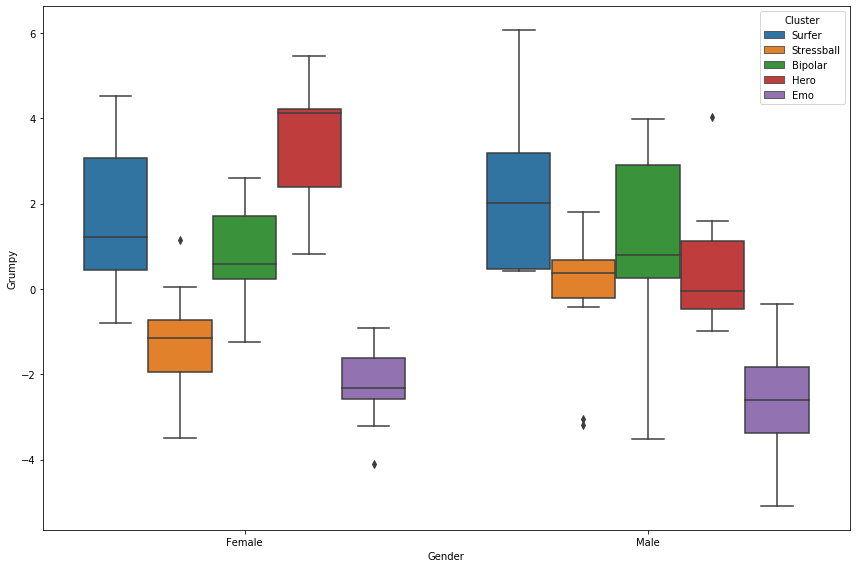

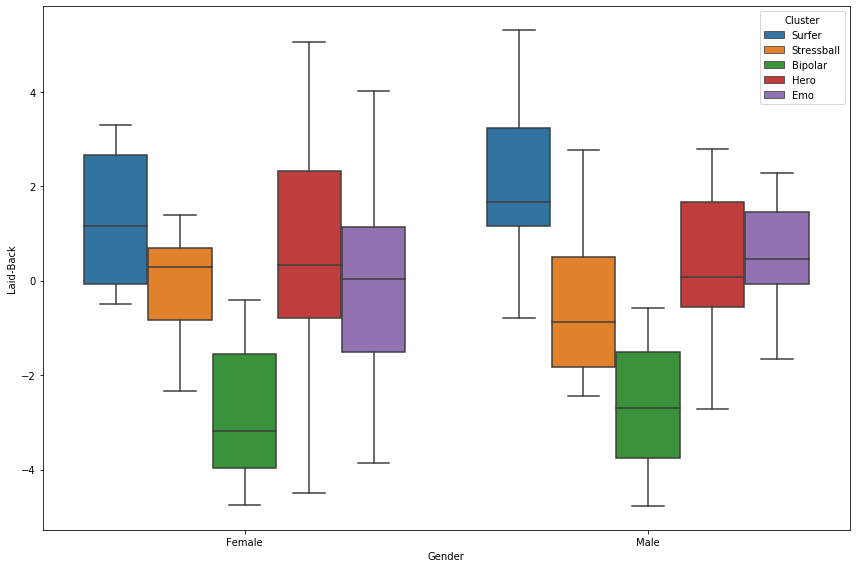

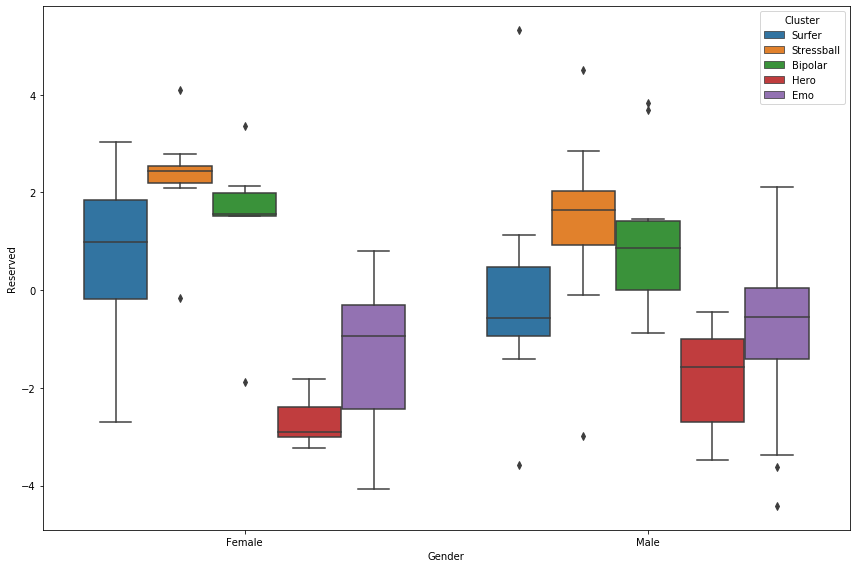

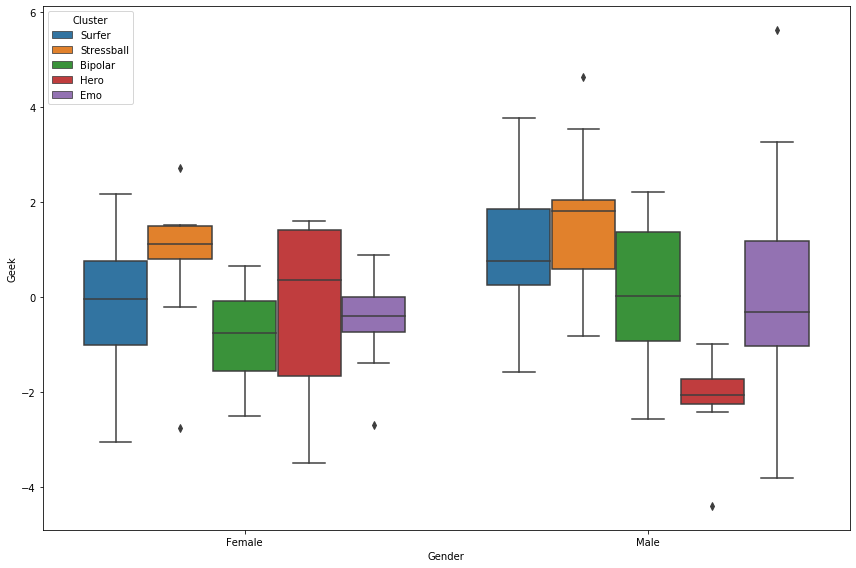

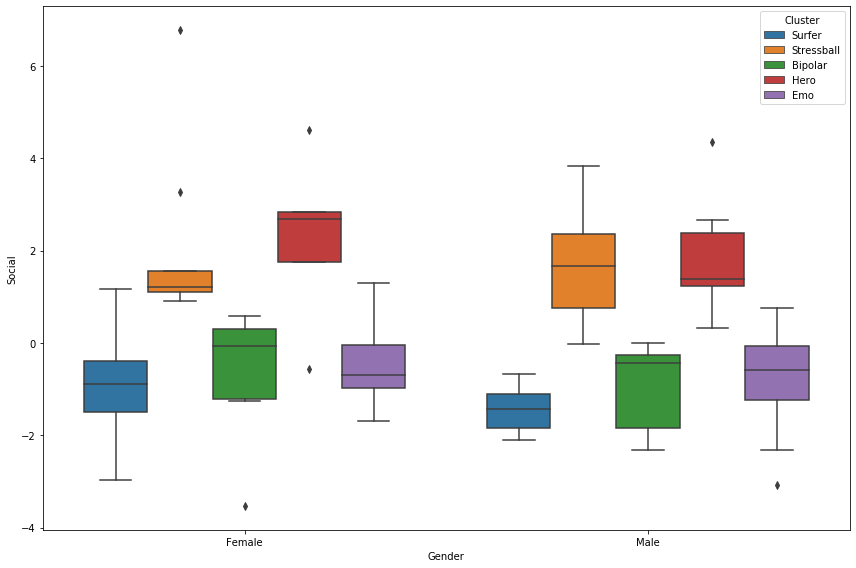

In [41]:
#######################
#Gender -Big 5 Personality
########################

# Grumpy
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Grumpy',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()



# Laid_Back
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Laid-Back',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

# Reserved
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Reserved',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

# Geek
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Geek',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()


# Social
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Social',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()




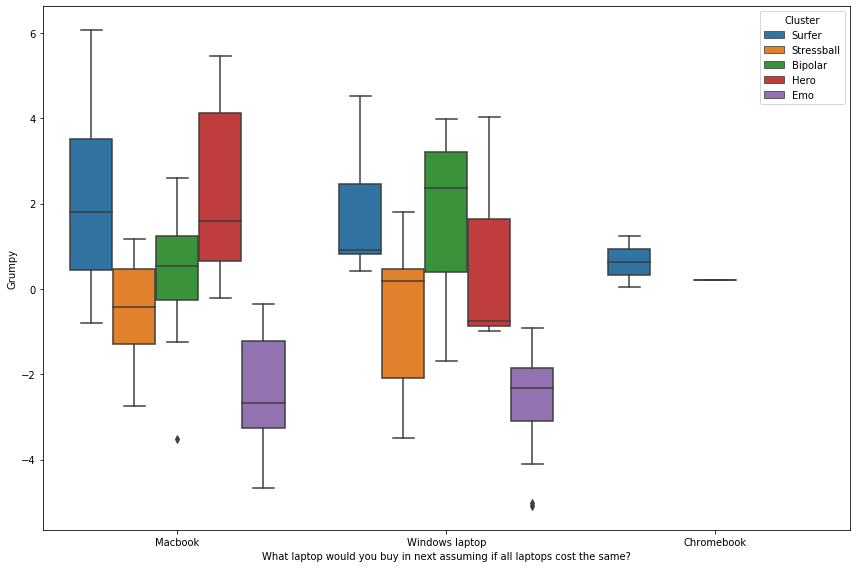

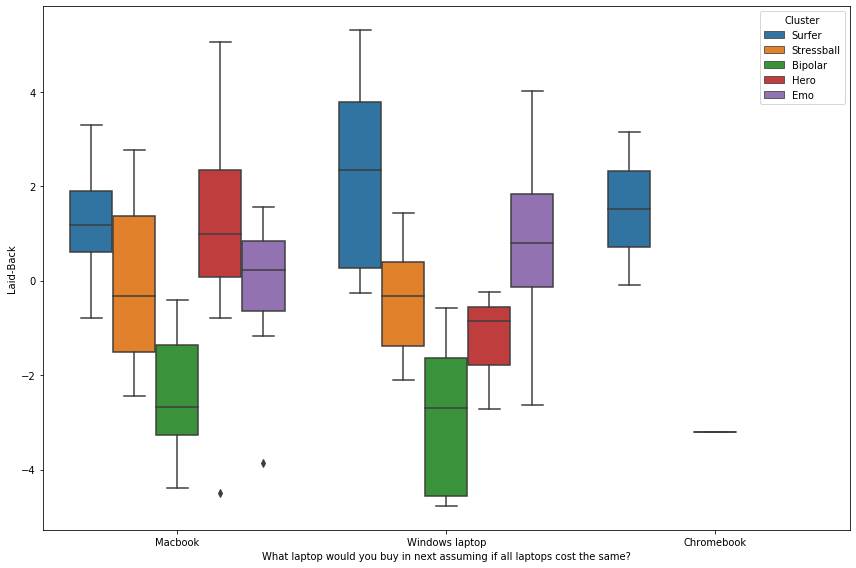

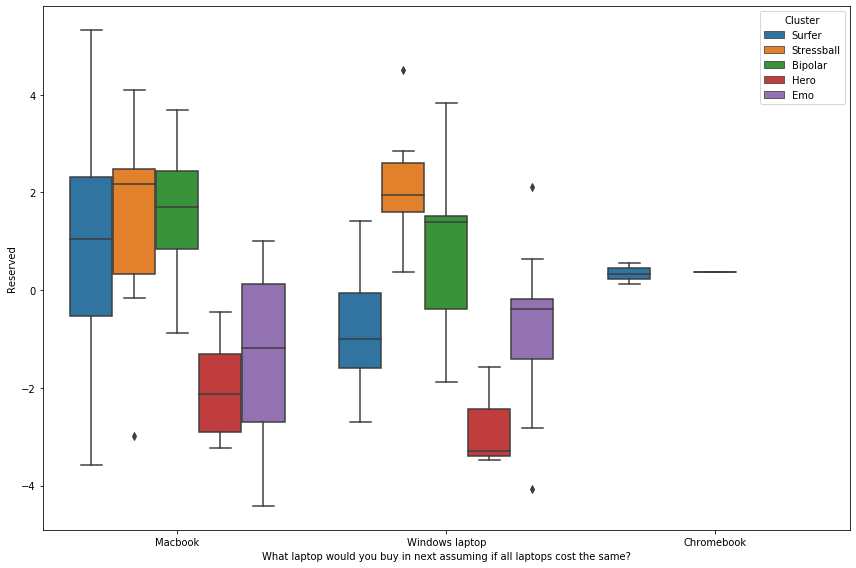

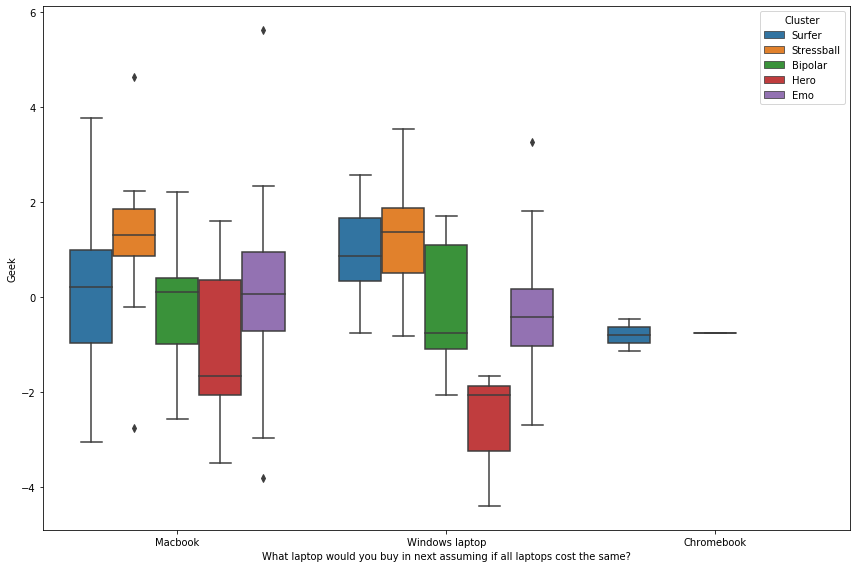

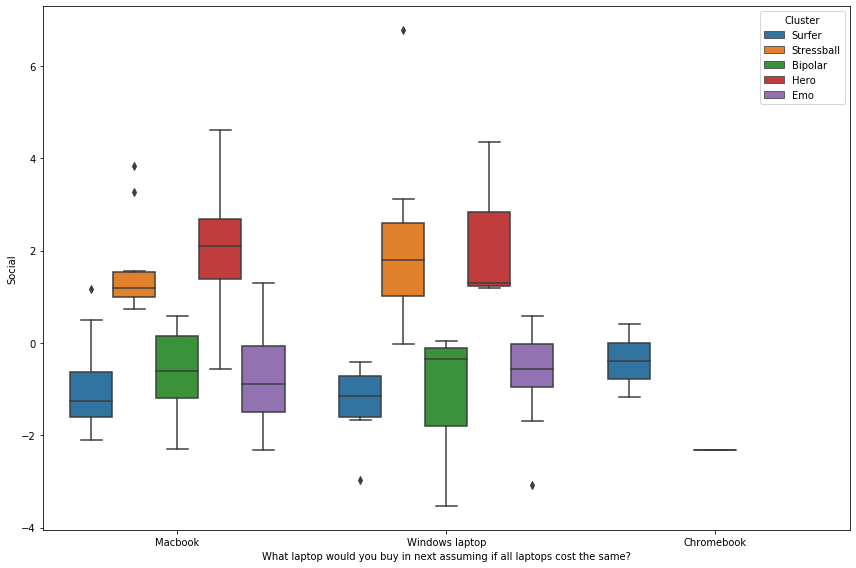

In [42]:
#######################
#What laptop would you buy in next assuming if all laptops cost the same? -Big 5 Personality
########################

# Grumpy
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Grumpy',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()



# Laid_Back
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Laid-Back',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

# Reserved
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Reserved',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

# Geek
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Geek',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()


# Social
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Social',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()


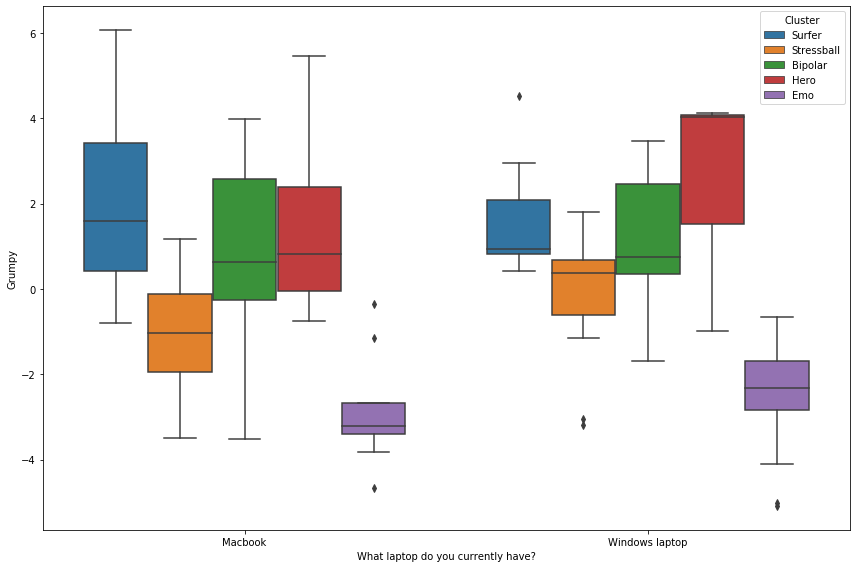

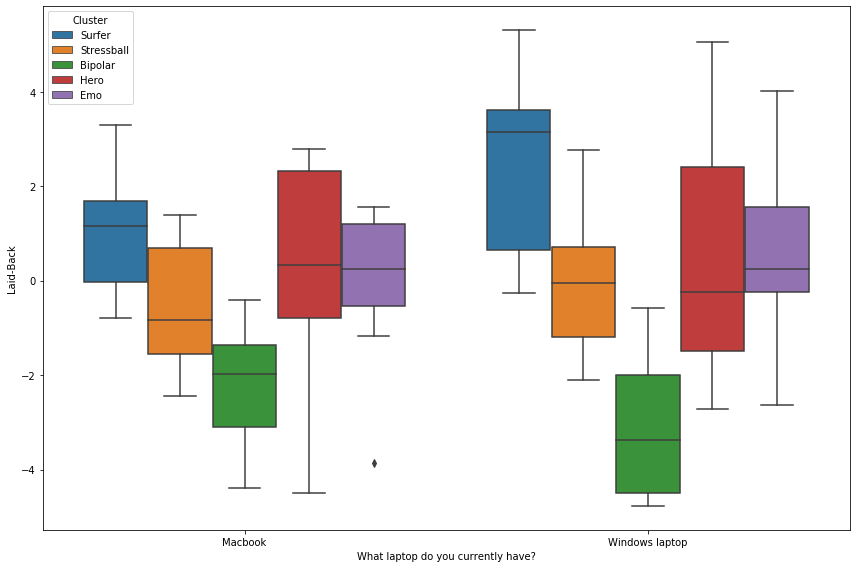

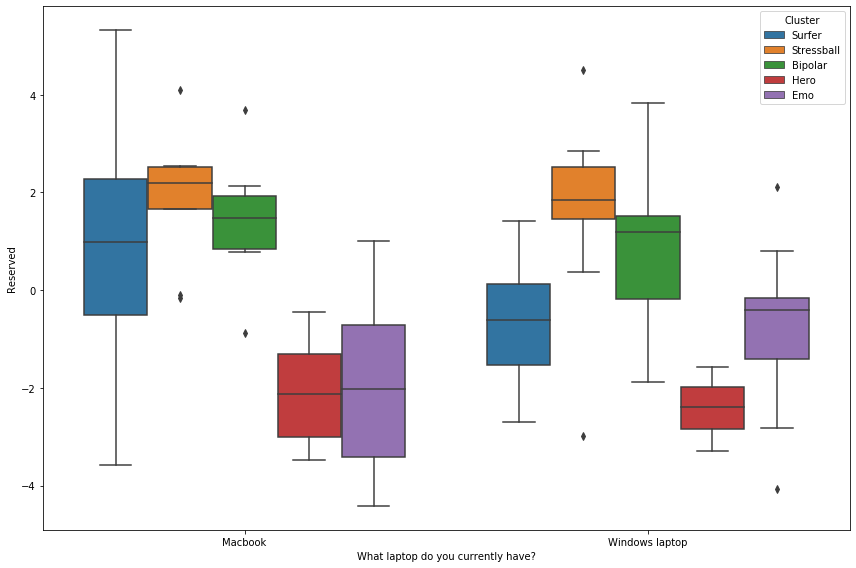

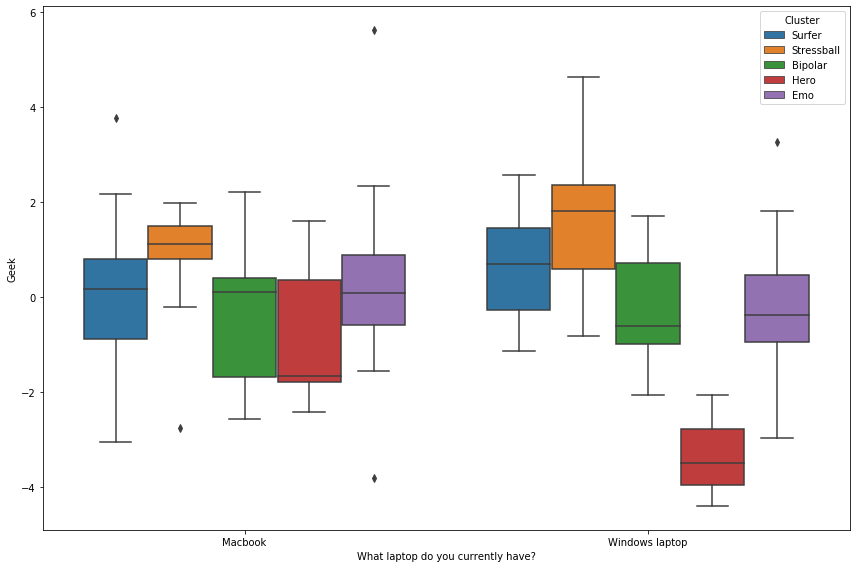

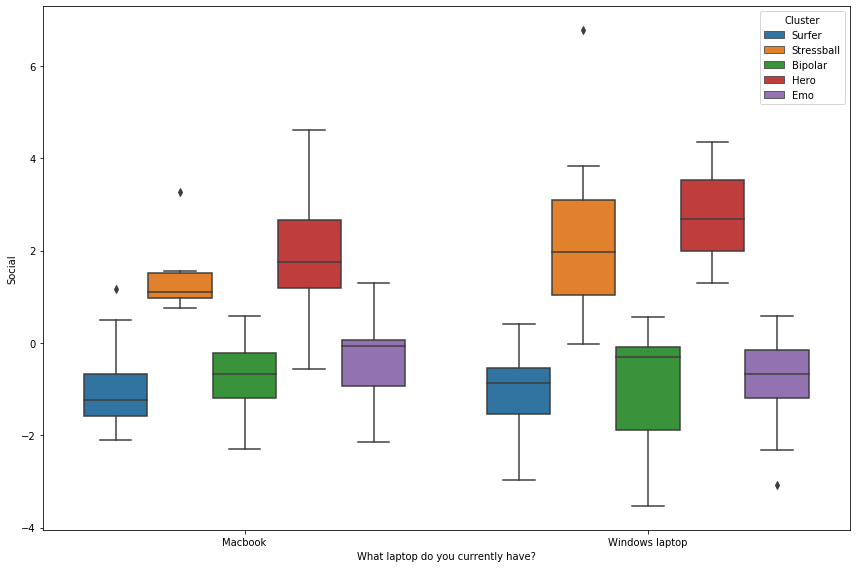

In [43]:
#######################
#What laptop do you currently have? - Big 5 Personality
########################

# Grumpy
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Grumpy',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()



# Laid_Back
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Laid-Back',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

# Reserved
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Reserved',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

# Geek
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Geek',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()


# Social
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Social',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()


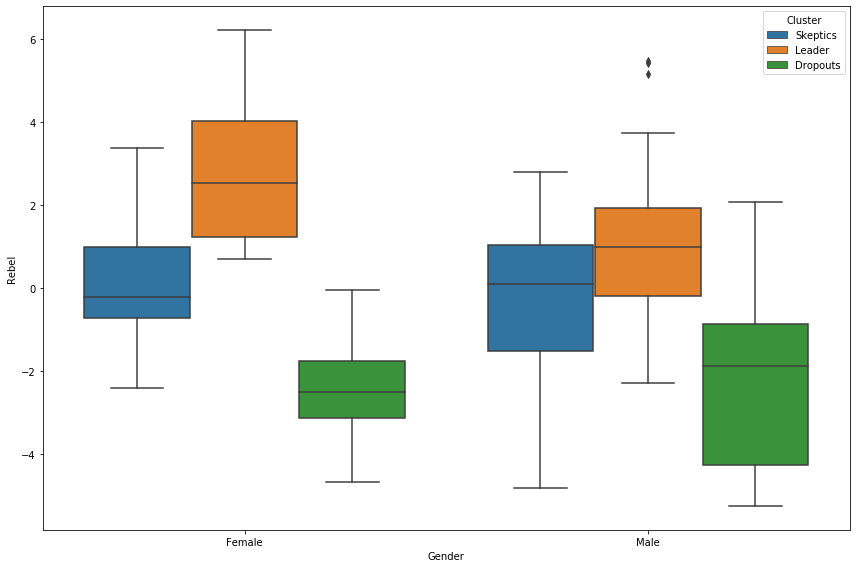

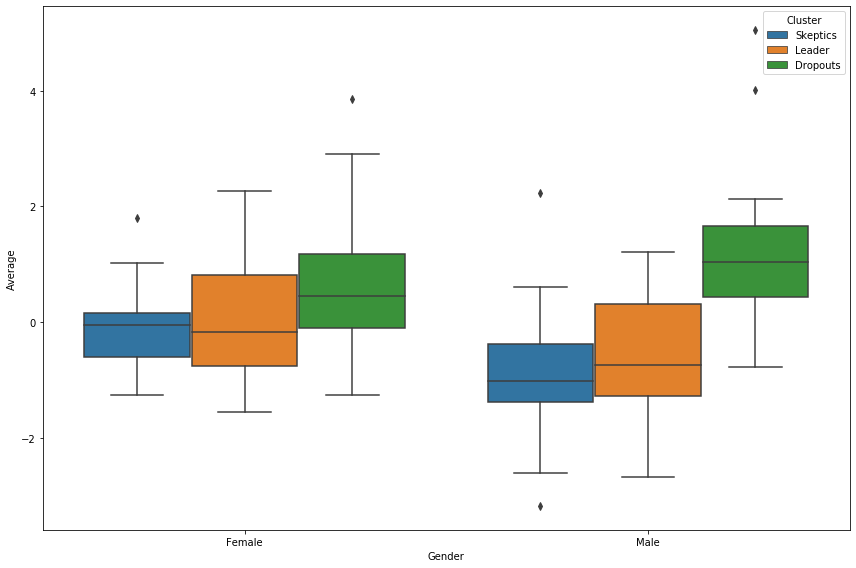

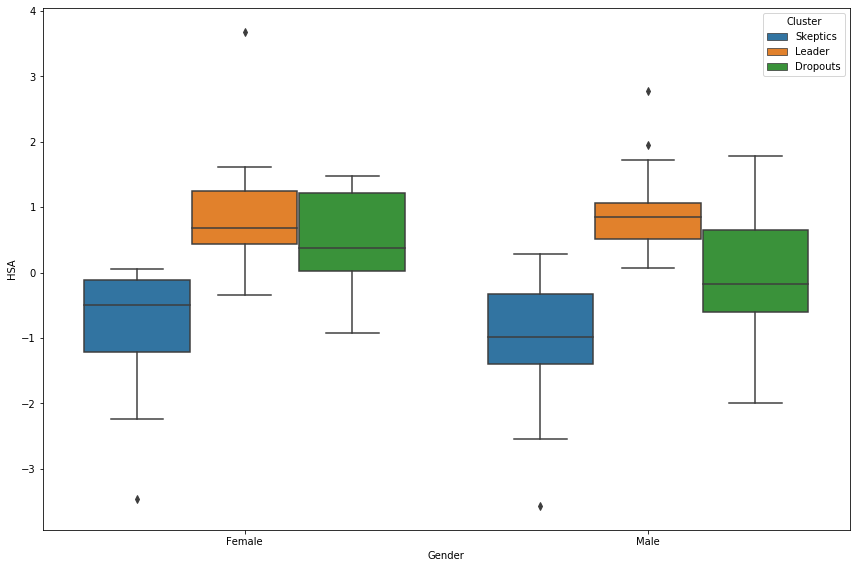

In [44]:
#######################
#Gender -Hult DNA
########################

# Rebel
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Rebel',
            hue = 'Cluster',
            data = data_df_h)


plt.tight_layout()
plt.show()



# Average
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Average',
            hue = 'Cluster',
            data = data_df_h)


plt.tight_layout()
plt.show()

# HSA
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'HSA',
            hue = 'Cluster',
            data = data_df_h)


plt.tight_layout()
plt.show()



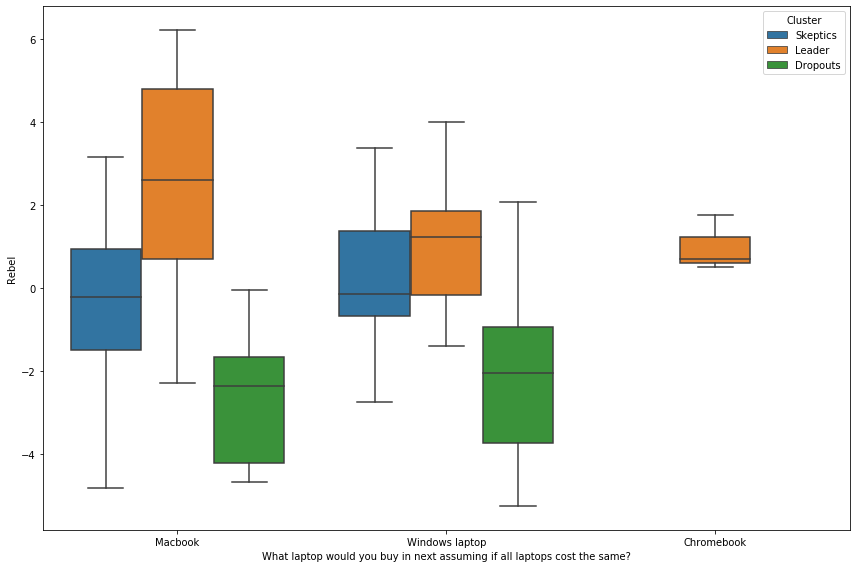

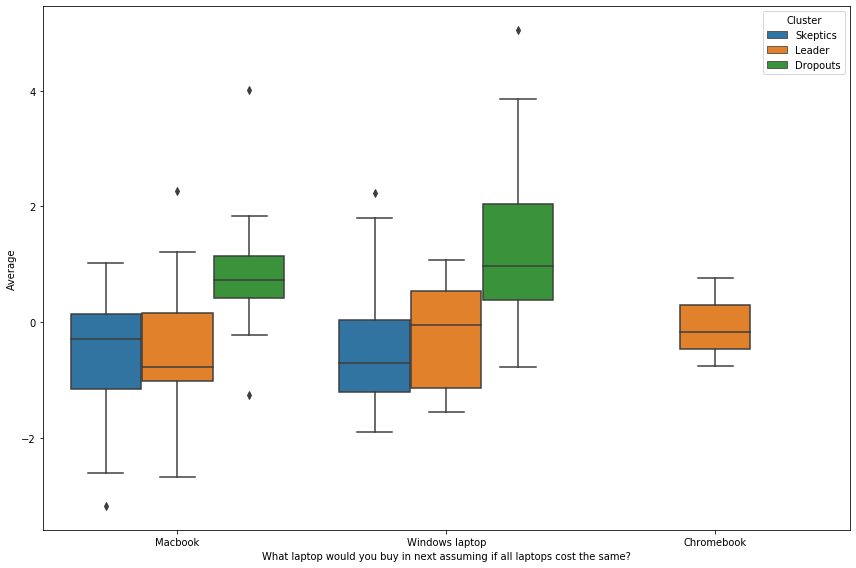

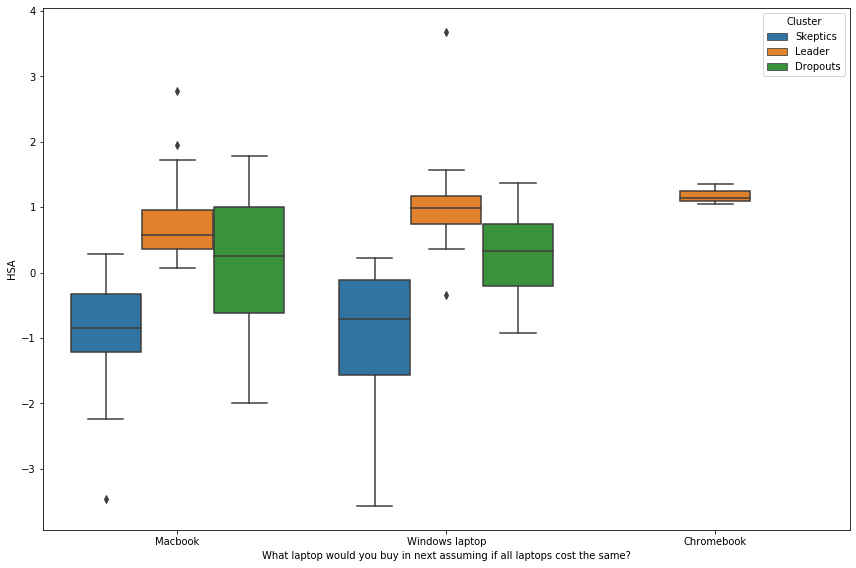

In [45]:
#######################
#What laptop would you buy in next assuming if all laptops cost the same? -Hult DNA
########################

# Rebel
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Rebel',
            hue = 'Cluster',
            data = data_df_h)


plt.tight_layout()
plt.show()



# Average
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Average',
            hue = 'Cluster',
            data = data_df_h)


plt.tight_layout()
plt.show()

# HSA
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'HSA',
            hue = 'Cluster',
            data = data_df_h)


plt.tight_layout()
plt.show()

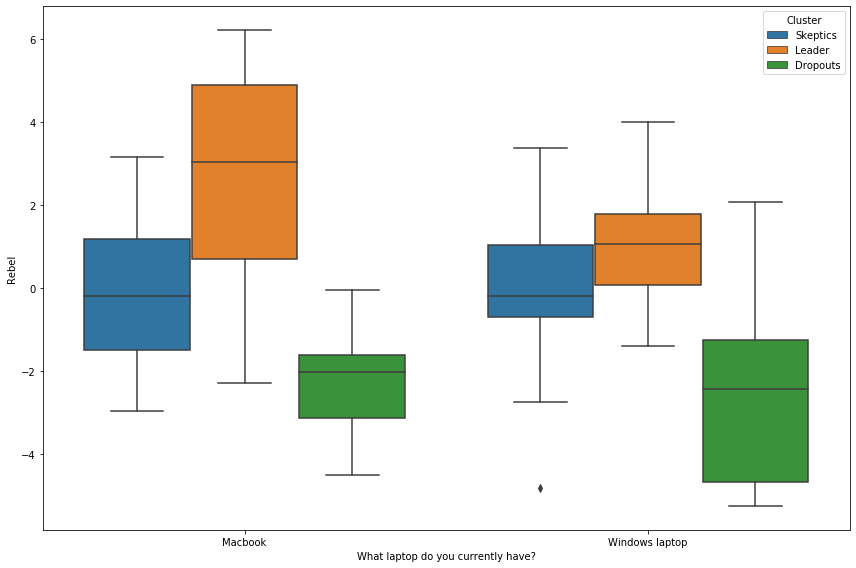

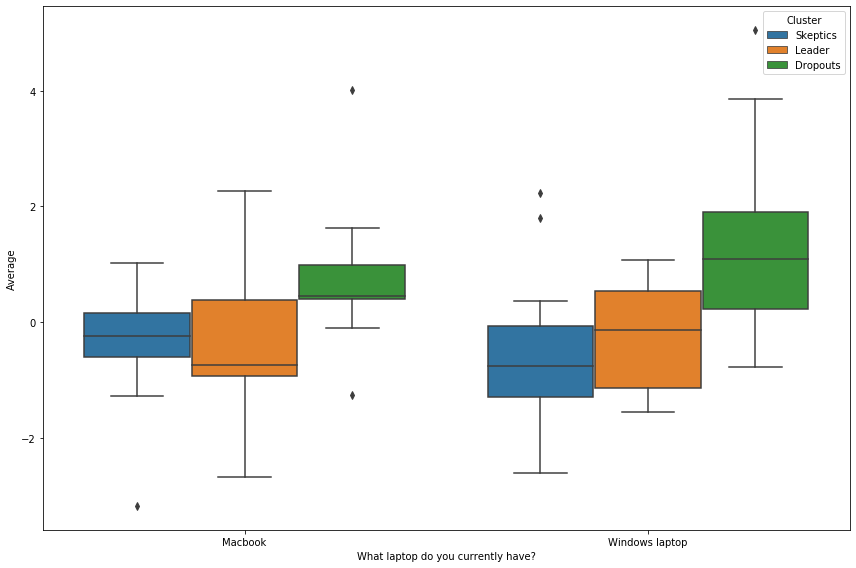

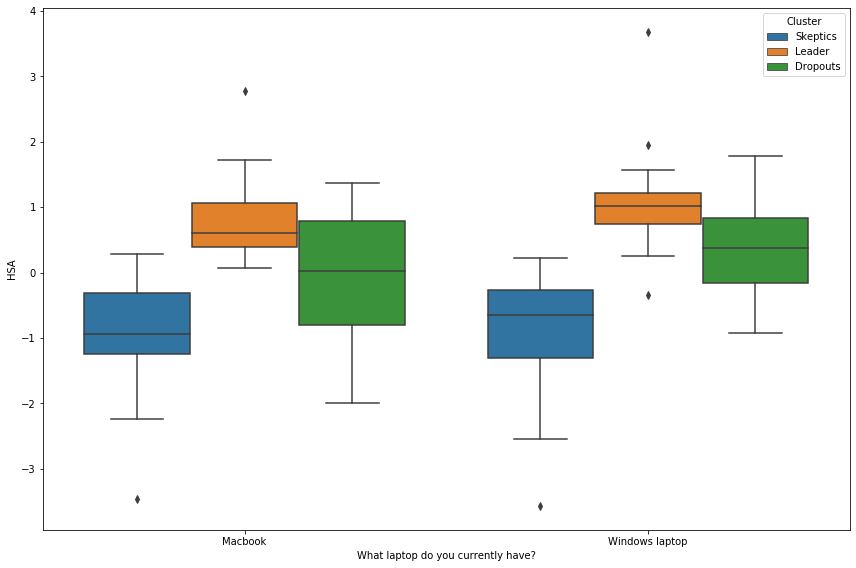

In [46]:
#######################
#What laptop do you currently have?  -Hult DNA
########################

# Rebel
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Rebel',
            hue = 'Cluster',
            data = data_df_h)


plt.tight_layout()
plt.show()



# Average
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Average',
            hue = 'Cluster',
            data = data_df_h)


plt.tight_layout()
plt.show()

# HSA
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'HSA',
            hue = 'Cluster',
            data = data_df_h)


plt.tight_layout()
plt.show()

<h1> Insights and Recommendations </h1><br>

I have made a write up of the insights and recommendations that are discovered in this analysis. It is in the link below to my Github page. Thank you for reading my work and feel free to write any opinions you may have.


<h1> Source </h1><br>
All rights and data are from:
Hult International Business Scool
Purpose is academic only and not intended to make verifiable facts about possible computer purchasing